# Data Description
### Dataset - Boston Housing
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

# Necessary imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Virnael\AppData\Local\Programs\Python\Python37-32\Lib\site-packages\graphviz'
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Read in the data from the database

In [2]:
database = "C:\Program Files\SQLite\\boston.db"
try:
    conn = sqlite3.connect(database)
except Error as e:
    print(e)

In [3]:
housing = pd.read_sql_query("SELECT * FROM housing", conn)
# change na to nan
housing.replace('NA', np.nan, inplace=True)

In [4]:
housing.shape

(1460, 80)

# Show the data

In [5]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.iloc[:,:50].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000


In [7]:
housing.iloc[:,51:100].describe()

,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
housing.GarageCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

# Data Exploration

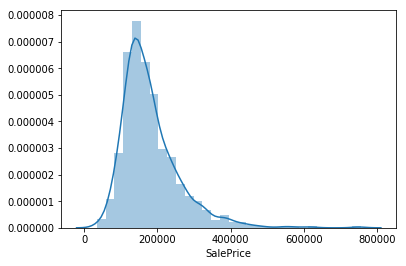

In [9]:
sns.distplot(housing['SalePrice'], bins=30)
plt.show()

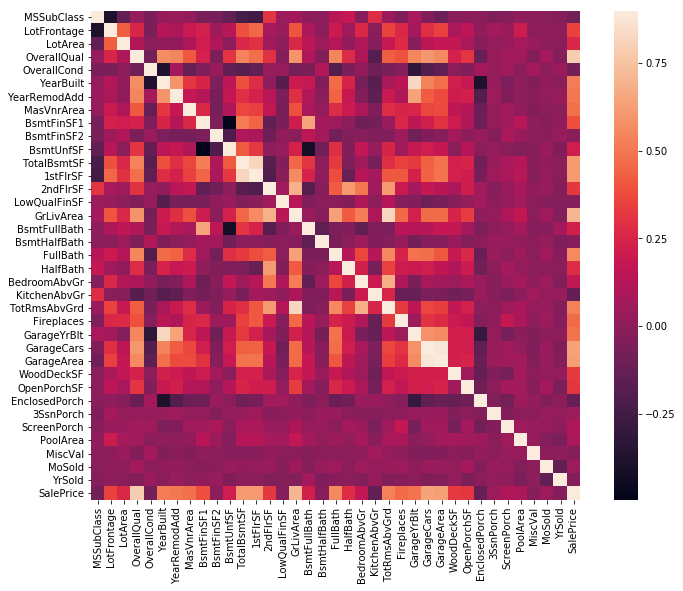

In [10]:
corr=housing.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, square=True)
plt.show()

### Creating Additional Feature - Total Area
#### Basement + 1st + 2nd Floot

C:\Users\Virnael\AppData\Local\Programs\Python\Python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


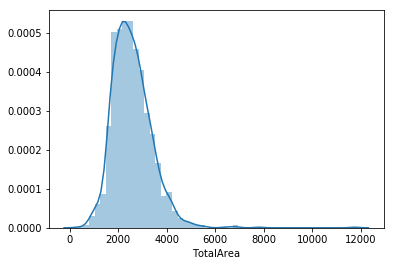

In [11]:
housing['TotalArea'] = housing['TotalBsmtSF'] + housing['1stFlrSF'] + housing['2ndFlrSF']
housing.TotalArea.describe()
sns.distplot(housing.TotalArea)

C:\Users\Virnael\AppData\Local\Programs\Python\Python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


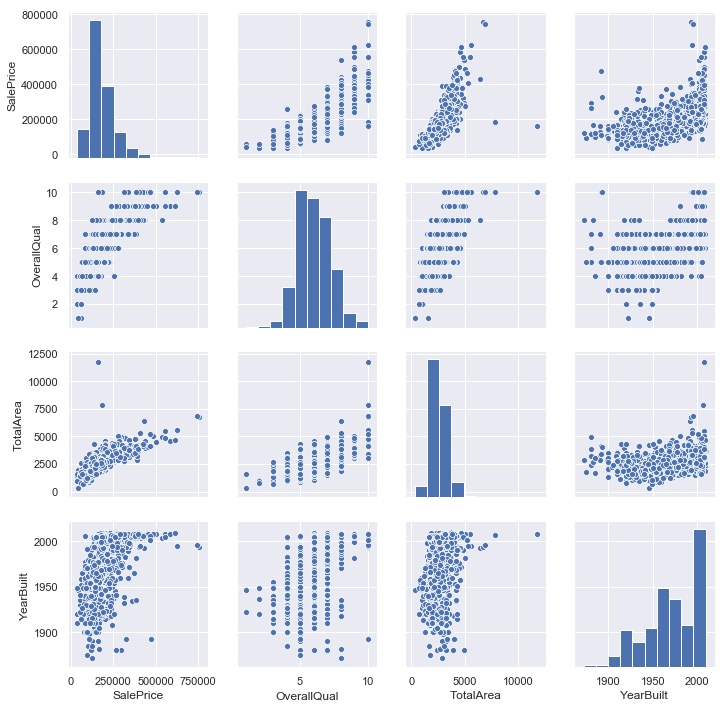

In [12]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'TotalArea', 'YearBuilt']
sns.pairplot(housing[cols], size = 2.5)
plt.show();

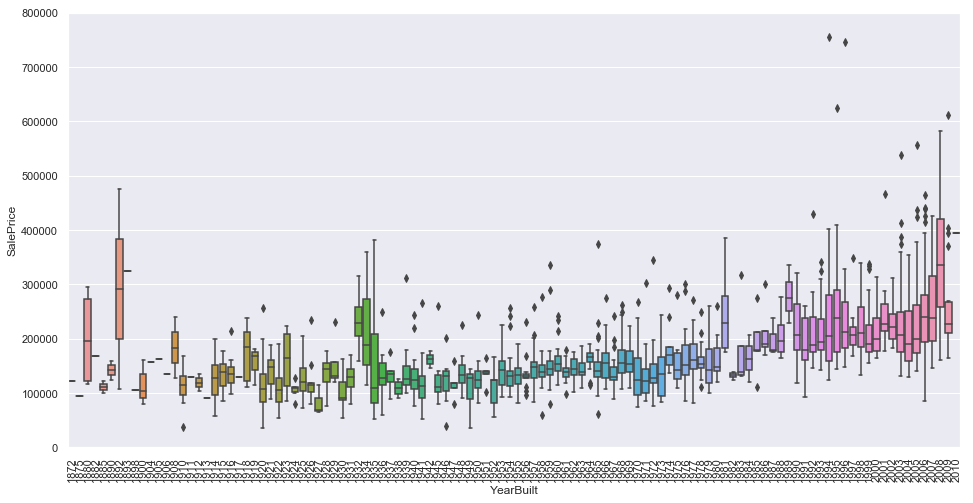

In [13]:
f,ax=plt.subplots(figsize=(16,8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=housing)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);
plt.show()

# Feature engineering

### Deleting Outliers

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


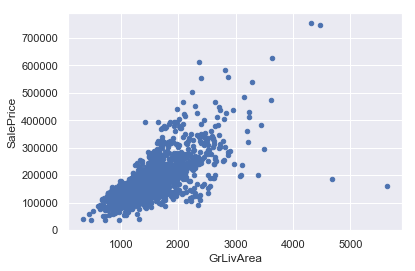

In [14]:
housing.plot.scatter('GrLivArea','SalePrice')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


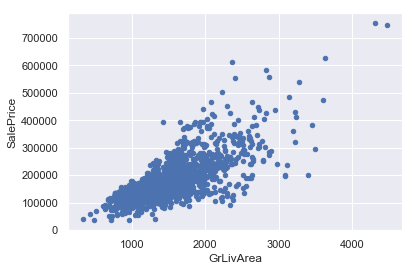

In [15]:
housing = housing.drop(housing[housing['GrLivArea']>4550].index)
housing.plot.scatter('GrLivArea','SalePrice')
plt.show()

### Deleting Incomplete Features

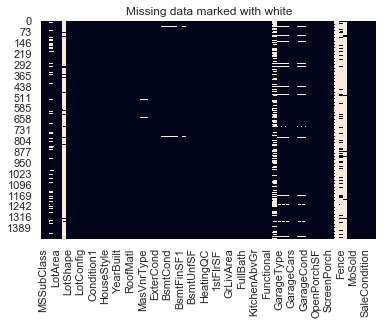

In [16]:
sns.heatmap(housing.isnull(), cbar=False)
plt.title('Missing data marked with white')
plt.show()

In [17]:
# Taking garage data for later use
garage = housing[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']]

#Showing columns with most missing values
housing_na = (housing.isna().sum()/len(housing))*100
housing_missing = pd.DataFrame({'Missing':housing_na}).sort_values(by='Missing', ascending=False)
housing_missing.head(20)

,Missing
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
FireplaceQu,47.325103
LotFrontage,17.764060
GarageYrBlt,5.555556
GarageQual,5.555556
GarageFinish,5.555556
GarageCond,5.555556


In [18]:
print("Data shape before deleting missing data: "+str(housing.shape))
#Dropping first 20 features
housing.drop(list(housing_missing.index.values)[:20], axis=1, inplace=True)
#Dropping nan cells
housing.dropna()
print("Data shape after deleting missing data: "+str(housing.shape))

Data shape before deleting missing data: (1458, 81)
Data shape after deleting missing data: (1458, 61)


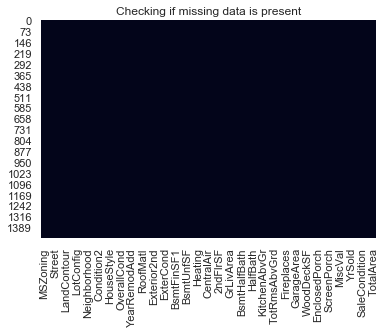

In [19]:
sns.heatmap(housing.isnull(), cbar=False)
plt.title('Checking if missing data is present')
plt.show()

### Showing categorical and numerical features

In [20]:
cat_feats = housing.select_dtypes(include=["object"]).columns
print(cat_feats, len(cat_feats))

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object') 27


In [21]:
num_feats = housing.select_dtypes(exclude=["object"]).columns
print(num_feats, len(num_feats))

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'TotalArea'],
      dtype='object') 34


# Checking for skewed data features

In [22]:
skewed_feats = housing[num_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
print("There are {} skewed numerical features.".format(len(skewed_feats)))

There are 19 skewed numerical features.


In [23]:
# Fixing skewness using log1p
# https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution
housing[skewed_feats.index] = np.log1p(housing[skewed_feats.index])
housing = pd.get_dummies(housing)

# Dividing data to test and train datasets

In [24]:
y = housing.SalePrice
train = housing.drop('SalePrice',axis=1)
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [25]:
train.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.042040,7,5,2003,2003,6.561031,0.0,5.017280,856,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,9.169623,6,8,1976,1976,6.886532,0.0,5.652489,1262,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,9.328212,7,5,2001,2002,6.188264,0.0,6.075346,920,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,9.164401,7,5,1915,1970,5.379897,0.0,6.293419,756,6.869014,...,0,0,0,1,1,0,0,0,0,0
4,9.565284,8,5,2000,2000,6.486161,0.0,6.196444,1145,7.044033,...,0,0,0,1,0,0,0,0,1,0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3)

# Creating Linear regression model

In [27]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

### Making predictions

In [28]:
print ("R^2 is: ", model.score(X_test, y_test))
predictions = model.predict(X_test)
print ('RMSE is: ', mean_squared_error(y_test, predictions))

R^2 is:  0.9130723502080782
RMSE is:  0.014366359038996673


# Data Visuzalization of resutls

In [29]:
TotalAreaTrain = np.expm1(X_train['TotalArea'])
PriceTrain = np.expm1(y_train)

TotalAreaTest = np.expm1(X_test['TotalArea'])
PriceTest = np.expm1(y_test)

PricePredicted = np.expm1(predictions)

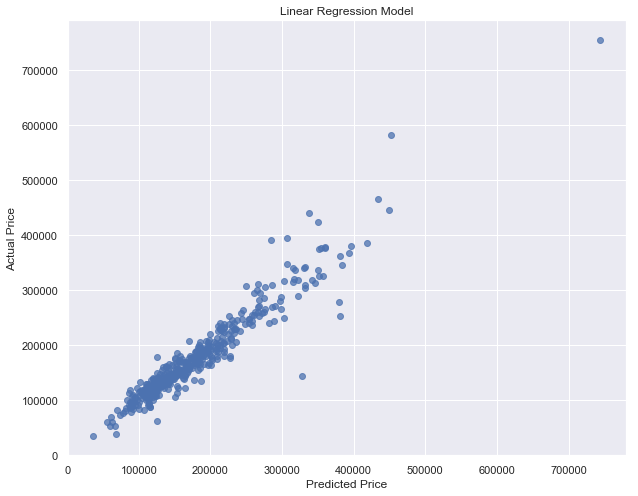

In [30]:
fig, ax = plt.subplots(figsize=(10,8))

plt.scatter(PricePredicted, PriceTest, alpha=.75,
            color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

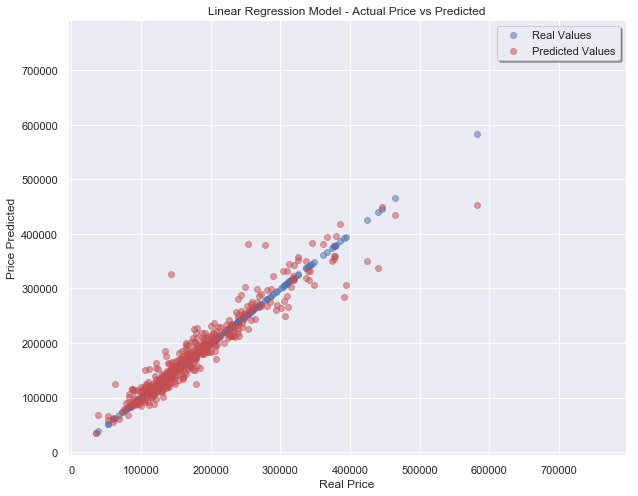

In [31]:
fig, ax = plt.subplots(figsize=(10,8))

plt.scatter(PriceTest, PriceTest, alpha=.5,color='b', label ='Real Values')
plt.scatter(PriceTest, PricePredicted, alpha=.5, color='r', label ='Predicted Values')

legend = ax.legend(loc='upper right', shadow=True)
plt.xlabel('Real Price')
plt.ylabel('Price Predicted')
plt.title('Linear Regression Model - Actual Price vs Predicted')
plt.show()

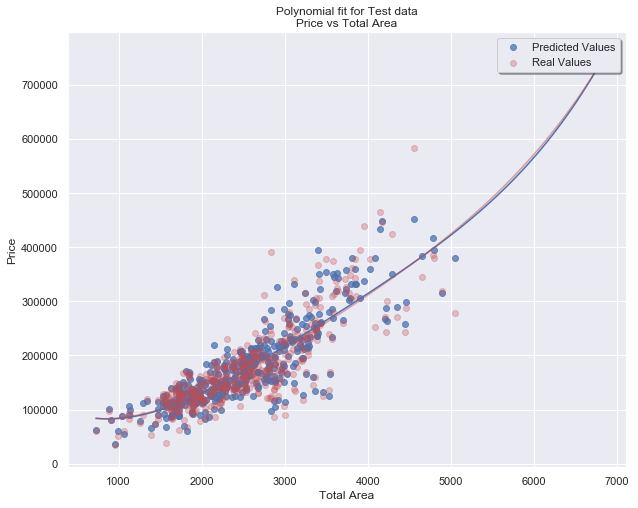

In [32]:
fig, ax = plt.subplots(figsize=(10,8))

plt.scatter(TotalAreaTest, PricePredicted, alpha=.75, color='b', label ='Predicted Values')
plt.scatter(TotalAreaTest, PriceTest, alpha=.3, color='r', label ='Real Values')

p = np.poly1d(np.polyfit(TotalAreaTest, PricePredicted, 4))
xp = np.linspace(min(TotalAreaTest), max(TotalAreaTest), 100)
plt.plot(xp, p(xp), '-', color='b')

pt = np.poly1d(np.polyfit(TotalAreaTest, PriceTest, 4))
xpt = np.linspace(min(TotalAreaTest), max(TotalAreaTest), 100)
plt.plot(xpt, pt(xpt), '-', color='r', alpha=0.5)

legend = ax.legend(loc='upper right', shadow=True)
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.title('Polynomial fit for Test data\nPrice vs Total Area')
plt.show()

# Decision Tree to detect Garage Cars number

In [33]:
#Instead of droping NA accepting 0 as valid answe
garage.GarageCars = garage.GarageCars.astype(str)
garage.head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA


In [34]:
garage.describe()

,GarageYrBlt,GarageArea
count,1377.000000,1458.000000
mean,1978.464052,472.050069
std,24.682879,212.239248
min,1900.000000,0.000000
25%,1961.000000,331.500000
50%,1980.000000,479.500000
75%,2002.000000,576.000000
max,2010.000000,1390.000000


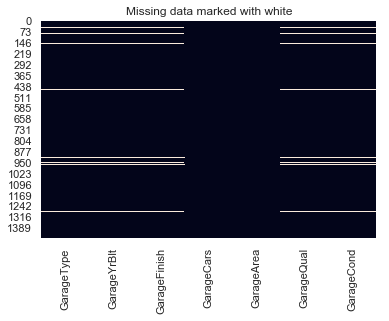

In [35]:
sns.heatmap(garage.isnull(), cbar=False)
plt.title('Missing data marked with white')
plt.show()

In [36]:
print(garage.GarageType.value_counts(),'\n\n',
      garage.GarageFinish.value_counts(),'\n\n',
      garage.GarageQual.value_counts(),'\n\n',
      garage.GarageCond.value_counts())

Attchd     869
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

 Unf    605
RFn    422
Fin    350
Name: GarageFinish, dtype: int64 

 TA    1309
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64 

 TA    1324
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [37]:
garage.GarageCars.value_counts()

2    823
1    369
3    180
0     81
4      5
Name: GarageCars, dtype: int64

## Restricting some data

In [38]:
# Choosing only two types of garage
garage = garage[garage['GarageType'].isin(['Attchd', 'Detchd'])]
print(garage.GarageType.value_counts())

Attchd    869
Detchd    387
Name: GarageType, dtype: int64


In [39]:
#Choosing only garages with 1 2 3 places for car
garage = garage[garage['GarageCars'].isin(['1','2','3'])]
print(garage.GarageCars.value_counts())

2    755
1    350
3    147
Name: GarageCars, dtype: int64


In [40]:
garage = garage.drop(['GarageCond', 'GarageQual'], axis=1)
garage.head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea
0,Attchd,2003.0,RFn,2,548
1,Attchd,1976.0,RFn,2,460
2,Attchd,2001.0,RFn,2,608
3,Detchd,1998.0,Unf,3,642
4,Attchd,2000.0,RFn,3,836


In [41]:
y = garage.GarageCars

In [42]:
train = garage.drop('GarageCars', axis=1)
train.head()

,GarageType,GarageYrBlt,GarageFinish,GarageArea
0,Attchd,2003.0,RFn,548
1,Attchd,1976.0,RFn,460
2,Attchd,2001.0,RFn,608
3,Detchd,1998.0,Unf,642
4,Attchd,2000.0,RFn,836


In [43]:
# Categorical variables not acceptable so dummy variables needs to be created
train = pd.get_dummies(train)
train.GarageYrBlt.astype(int)
train.GarageArea.astype(int)
train.head()

,GarageYrBlt,GarageArea,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,2003.0,548,1,0,0,1,0
1,1976.0,460,1,0,0,1,0
2,2001.0,608,1,0,0,1,0
3,1998.0,642,0,1,0,0,1
4,2000.0,836,1,0,0,1,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3)

# Model creation and fit

In [45]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=3, criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

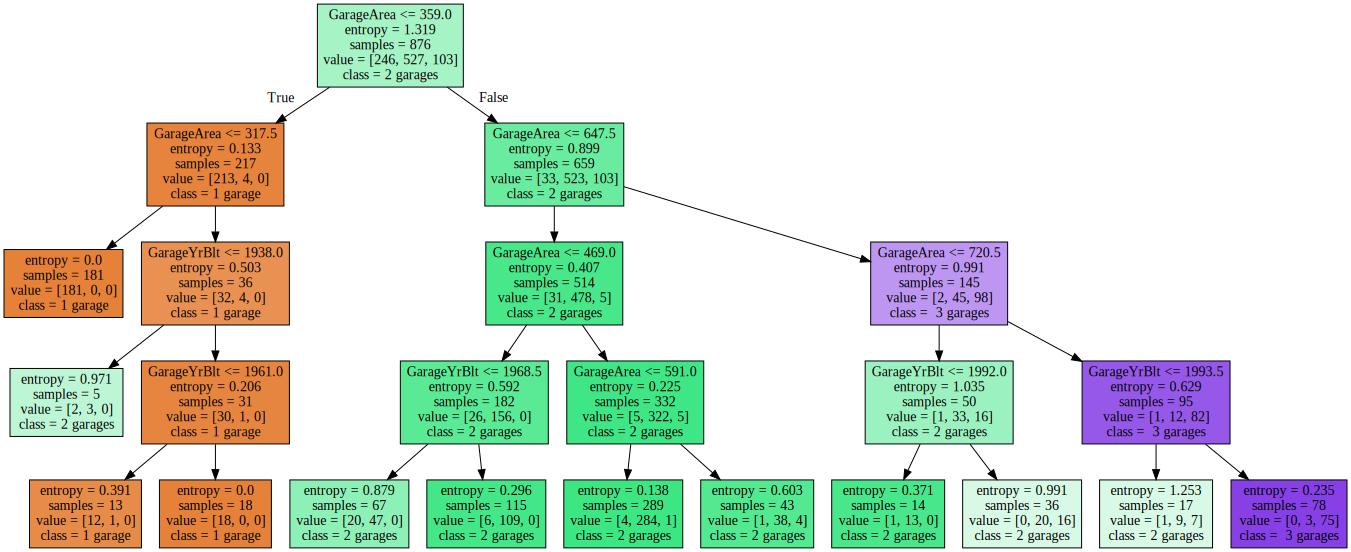

True

In [46]:
dot_data = tree.export_graphviz(dt, out_file=None,
                                    filled = True,
                                    feature_names=train.columns,
                                    class_names=['1 garage','2 garages',' 3 garages'])

graph = Source(dot_data)
display(SVG(graph.pipe(format='svg')))

#Saving to file
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('Garage_tree.png')

In [47]:
predictions = dt.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Model Accuracy is: "+ str(acc))

Model Accuracy is: 0.9202127659574468
